# Evolutionary status

## 1 - Baraffe et al. 2015

In [292]:
# Read data 
m08, it08, iteff08, iL08, rad_core08 = N.genfromtxt('data/BT_0.8MS.txt', usecols=(0,1,2,3,10), unpack=True)
it = N.bitwise_and(it08 > N.log10(9.5e6), it08 < N.log10(800.e6))
t08 = it08[it]; teff08 = iteff08[it]; L08 = iL08[it]
m09, it09, iteff09, iL09, rad_core09 = N.genfromtxt('data/BT_0.9MS.txt', usecols=(0,1,2,3,10), unpack=True)
it = N.bitwise_and(it09 > N.log10(9.4e6), it09 < N.log10(800.e6))
t09 = it09[it]; teff09 = iteff09[it]; L09 = iL09[it]
m1 , it1,  iteff1 , iL1 , rad_core1  = N.genfromtxt('data/BT_1MS.txt', usecols=(0,1,2,3,10), unpack=True)
it = N.bitwise_and(it1 > N.log10(9.5e6), it1 < N.log10(800.e6))
t1 = it1[it]; teff1 = iteff1[it]; L1 = iL1[it]
m11, it11, iteff11, iL11, rad_core11 = N.genfromtxt('data/BT_1.1MS.txt', usecols=(0,1,2,3,10), unpack=True)
it = N.bitwise_and(it11 > N.log10(9.5e6), it11 < N.log10(800.e6))
t11 = it11[it]; teff11 = iteff11[it]; L11 = iL11[it]
m12, it12, iteff12, iL12, rad_core12 = N.genfromtxt('data/BT_1.2MS.txt', usecols=(0,1,2,3,10), unpack=True)
it = N.bitwise_and(it12 > N.log10(9.5e6), it12 < N.log10(800.e6))
t12 = it12[it]; teff12 = iteff12[it]; L12 = iL12[it]




# Read isochrones 
iso625, iso625_teff, iso625_L = N.genfromtxt('data/BISO_625Myr.txt', usecols=(0,2,3), unpack=True)
iso30, iso30_teff, iso30_L = N.genfromtxt('data/BISO_30Myr.txt', usecols=(0,2,3), unpack=True)
iso10, iso10_teff, iso10_L = N.genfromtxt('data/BISO_10Myr.txt', usecols=(0,2,3), unpack=True)

In [293]:
from matplotlib.ticker import MultipleLocator

P.style.use(['seaborn-white', 'seaborn-paper', 'seaborn-ticks'])
matplotlib.rc("font", family="Times New Roman", size=12)
matplotlib.rc('xtick', labelsize='medium')
matplotlib.rc('ytick', labelsize='medium')

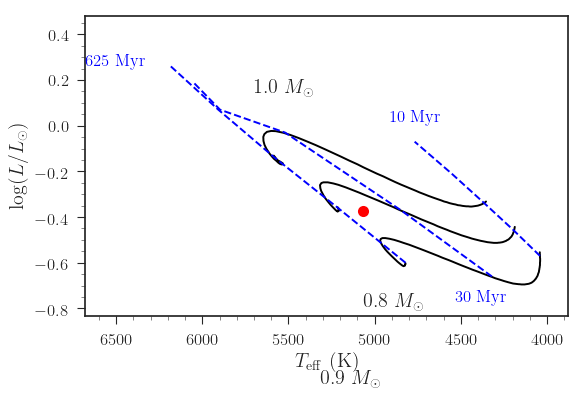

In [294]:
fig, ax = P.subplots(1,figsize=(6,4), dpi=100)
# Mass tracks
P.plot(teff08, L08, 'k' )
P.plot(teff09, L09, 'k' )
P.plot(teff1 , L1 , 'k' )
#P.plot(teff11, L11, 'k' )
#P.plot(teff12, L12, 'k' )


# Text mass 
P.text(1.02*teff08[N.argmax(teff08)], 1.6*L08[N.argmax(teff08)], r'$0.8~M_\odot$', fontsize='large')
P.text(teff09[N.argmax(teff09)], 4.4*L09[N.argmax(teff09)], r'$0.9~M_\odot$', fontsize='large')
P.text(1.01*teff1[N.argmax(teff1)], -2.7*L1[N.argmax(teff1)] , r'$1.0~M_\odot$', fontsize='large')
#P.text(1.02*teff11[N.argmax(teff11)], -0.5*L11[N.argmax(teff11)], r'$1.1~M_\odot$', fontsize='large')
#P.text(1.03*teff12[N.argmax(teff12)], 0.2*L12[N.argmax(teff12)], r'$1.2~M_\odot$', fontsize='large')


# Isochrones
P.plot(iso625_teff, iso625_L, '--b')
P.plot(iso30_teff, iso30_L, '--b')
P.plot(iso10_teff, iso10_L, '--b')


# Text Isochrones
P.text(1.08*iso625_teff[-1], iso625_L[-1], r'$625$ Myr', color='b', fontsize='medium')
P.text(1.05*iso30_teff[0], 1.17*iso30_L[0], r'$30$ Myr', color='b', fontsize='medium')
P.text(1.03*iso10_teff[-1], -0.2*iso10_L[-1], r'$10$ Myr', color='b', fontsize='medium')


# V471 Tau with mean luminosity.
P.plot(5066.,-0.375, 'or', ms=8)

# Text V471 Tau
#P.text(5000.,-0.375*0.8, 'V471 Tau', color='k', fontsize='medium', backgroundcolor='w')



P.xlim(1.08*teff12.max(), 0.96*teff08.min())
P.ylim(1.2*L08.min(),1.29*L12.max())
P.xlabel(r'$T_\mathrm{eff}$ (K)', fontsize='large')
P.ylabel(r'$\log (L/L_{\odot})$', fontsize='large')

#ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_minor_locator(MultipleLocator(100))
P.tight_layout()
P.savefig('evolutionary_K2_baraffe.pdf')

In [279]:
rstar = 0.93709
ic1 = N.argmin(abs(10**t1/1.e9 -0.625))
print('For a 1.0 Msun star, at %3d Myr' %(10**t1[ic1]/1.e6))
print('the radiative core goes up to r = %1.2f Rstar' %(rad_core1[ic1]/rstar))
print('\n')
ic2 = N.argmin(abs(10**t09/1.e9 -0.625))
print('For a 0.9 Msun star, at %3d Myr' %(10**t09[ic2]/1.e6))
print('the radiative core goes up to r = %1.2f Rstar' %(rad_core09[ic2]/rstar))
print('\n')
ic3 = N.argmin(abs(10**t08/1.e9 -0.625))
print('For a 0.8 Msun star, at %3d Myr' %(10**t08[ic3]/1.e6))
print('the radiative core goes up to r = %1.2f Rstar' %(rad_core08[ic3]/rstar))
print('\n')
print('We chose to take the averaged value between 0.8 and 0.9 solar masses models.')
print('r = %1.2f Rstar' %((rad_core08[ic3]+rad_core09[ic2])/rstar/2.))

For a 1.0 Msun star, at 627 Myr
the radiative core goes up to r = 0.59 Rstar


For a 0.9 Msun star, at 621 Myr
the radiative core goes up to r = 0.51 Rstar


For a 0.8 Msun star, at 628 Myr
the radiative core goes up to r = 0.45 Rstar


We chose to take the averaged value between 0.8 and 0.9 solar masses models.
r = 0.48 Rstar


------
## 2 - Siess et al. 2000

In [295]:
# Read data 
isL08, iSteff08, iSt08 = N.genfromtxt('data/ST_0.8MS.txt', usecols=(2,6,10), unpack=True)
it = N.bitwise_and(N.log10(iSt08) > N.log10(9.5e6), N.log10(iSt08) <N.log10(800.e6))
SL08 = N.log10(isL08[it]); Steff08 = iSteff08[it]; St08 = N.log10(iSt08[it])
isL09, iSteff09, iSt09 = N.genfromtxt('data/ST_0.9MS.txt', usecols=(2,6,10), unpack=True)
it = N.bitwise_and(N.log10(iSt09) > N.log10(9.4e6), N.log10(iSt09) <N.log10(800.e6))
SL09 = N.log10(isL09[it]); Steff09 = iSteff09[it]; St09 = N.log10(iSt09[it])
isL1, iSteff1, iSt1 = N.genfromtxt('data/ST_1MS.txt', usecols=(2,6,10), unpack=True)
it = N.bitwise_and(N.log10(iSt1) > N.log10(9.5e6), N.log10(iSt1) <N.log10(800.e6))
SL1 = N.log10(isL1[it]); Steff1 = iSteff1[it]; St1 = N.log10(iSt1[it])
isL11, iSteff11, iSt11 = N.genfromtxt('data/ST_1.1MS.txt', usecols=(2,6,10), unpack=True)
it = N.bitwise_and(N.log10(iSt11) > N.log10(9.5e6), N.log10(iSt11) <N.log10(800.e6))
SL11 = N.log10(isL11[it]); Steff11 = iSteff11[it]; St11 = N.log10(iSt11[it])
isL12, iSteff12, iSt12 = N.genfromtxt('data/ST_1.2MS.txt', usecols=(2,6,10), unpack=True)
it = N.bitwise_and(N.log10(iSt12) > N.log10(9.5e6), N.log10(iSt12) <N.log10(800.e6))
SL12 = N.log10(isL12[it]); Steff12 = iSteff12[it]; St12 = N.log10(iSt12[it])

# Read isochrones 
iSiso625_L, Siso625_teff = N.genfromtxt('data/SISO_625Myr.txt', usecols=(1,3), unpack=True)
Siso625_L = N.log10(iSiso625_L)
iSiso30_L, Siso30_teff = N.genfromtxt('data/SISO_30Myr.txt', usecols=(1,3), unpack=True)
Siso30_L = N.log10(iSiso30_L)
iSiso10_L, Siso10_teff = N.genfromtxt('data/SISO_10Myr.txt', usecols=(1,3), unpack=True)
Siso10_L = N.log10(iSiso10_L)

print('For a 0.9 Msun star, at 625 Myr')
print('the radiative core goes up to r = 0.68 Rstar')

For a 0.9 Msun star, at 625 Myr
the radiative core goes up to r = 0.68 Rstar


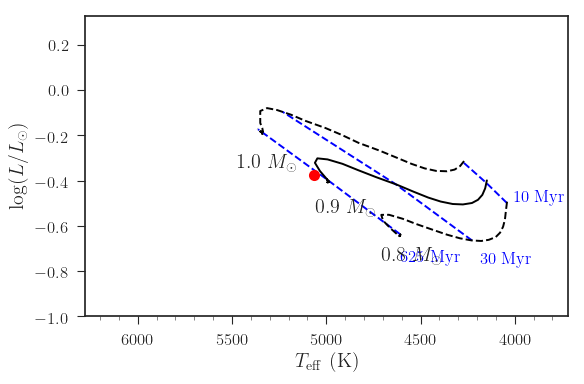

In [296]:
fig, ax = P.subplots(1,figsize=(6,4), dpi=100)

# Isochrones
P.plot(Siso625_teff, Siso625_L, '--b')
P.plot(Siso30_teff , Siso30_L, '--b')
P.plot(Siso10_teff , Siso10_L, '--b')

# Text Isochrones
P.text(1.0*Siso625_teff[0], 1.2*Siso625_L[0], r'$625$ Myr', color='b', fontsize='medium')
P.text(.99*Siso30_teff[0], 1.16*Siso30_L[0], r'$30$ Myr', color='b', fontsize='medium')
P.text(.99*Siso10_teff[0], 1.*Siso10_L[0], r'$10$ Myr', color='b', fontsize='medium')

# Mass tracks
P.plot(Steff08, SL08, '--k' )
P.plot(Steff09, SL09, 'k' )
P.plot(Steff1 , SL1 , '--k' )
#P.plot(Steff11, SL11, '--k' )
#P.plot(Steff12, SL12, '--k' )

# Text mass 
P.text(1.*Steff08[N.argmax(Steff08)], 1.15*SL08[N.argmin(SL08)], r'$0.8~M_\odot$', fontsize='large')
P.text(1.*Steff09[N.argmax(Steff09)], 1.1*SL09[N.argmin(SL09)] , r'$0.9~M_\odot$', fontsize='large')
P.text(1.02*Steff1[N.argmax(Steff1)], 1.*SL1[N.argmin(SL1)]    , r'$1.0~M_\odot$', fontsize='large')
#P.text(1.03*Steff11[N.argmax(Steff11)], .7*SL11[N.argmin(SL11)]  , r'$1.1~M_\odot$', fontsize='large')
#P.text(1.04*Steff12[N.argmax(Steff12)], -.5*SL12[N.argmin(SL12)]  , r'$1.2~M_\odot$', fontsize='large')

# V471 Tau with mean luminosity.
P.plot(5066.,-0.375, 'or', ms=8)

# Text V471 Tau
#P.text(5000.,-0.375*0.8, 'V471 Tau', color='k', fontsize='medium', backgroundcolor='w')

P.xlim(1.05*Steff12.max(), 0.92*Steff08.min())
P.ylim(1.5*SL08.min(),1.05*SL12.max())
P.xlabel(r'$T_\mathrm{eff}$ (K)', fontsize='large')
P.ylabel(r'$\log (L/L_{\odot})$', fontsize='large')

#ax.tick_params(bottom=True, top=True, left=True, right=True)
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(100))
P.tight_layout()
P.savefig('evolutionary_K2_siess.pdf')

##### BOTH models

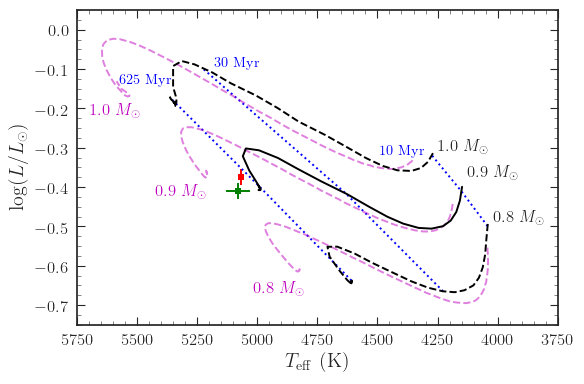

In [348]:
fig, ax = P.subplots(1,figsize=(6,4), dpi=100)

# Isochrones
P.plot(Siso625_teff, Siso625_L, ':b', alpha=4./4)
P.plot(Siso30_teff , Siso30_L , ':b', alpha=4./4)
P.plot(Siso10_teff , Siso10_L , ':b', alpha=4./4)

# Text Isochrones
P.text(1.04*Siso625_teff[-1], .8*Siso625_L[-1], r'$625$ Myr', color='b', fontsize='small')
P.text(.99*Siso30_teff[-1] , 1.*Siso30_L[-1], r'$30$ Myr', color='b', fontsize='small')
P.text(1.05*Siso10_teff[-1] , 1.*Siso10_L[-1], r'$10$ Myr', color='b', fontsize='small')

# Mass tracks Baraffe
P.plot(teff08, L08, '--m', alpha=1./2)
P.plot(teff09, L09, '--m', alpha=1./2)
P.plot(teff1 , L1 , '--m', alpha=1./2)
#P.plot(teff11, L11, '--m', alpha=1./2)
#P.plot(teff12, L12, '--m', alpha=1./2)

# Mass tracks Siess
P.plot(Steff08, SL08, '--k' )
P.plot(Steff09, SL09, 'k' )
P.plot(Steff1 , SL1 , '--k' )

# Text mass 
P.text(1.04*teff08[-1], 1.12*L08[-1], r'$0.8~M_\odot$', color='m', fontsize='medium')
P.text(1.04*teff09[-1], 1.2*L09[-1] , r'$0.9~M_\odot$', color='m',  fontsize='medium')
P.text(1.02*teff1[-1] , 1.7*L1[-1]  , r'$1.0~M_\odot$', color='m',  fontsize='medium')
#
P.text(.995*Steff08[0], 1.*SL08[0] , r'$0.8~M_\odot$', fontsize='medium')
P.text(.995*Steff09[0], .95*SL09[0], r'$0.9~M_\odot$', fontsize='medium')
P.text(.995*Steff1[0] , 1.*SL1[0]  , r'$1.0~M_\odot$', fontsize='medium')

# V471 Tau with mean luminosity.
#P.plot(5066.,-0.375, 'or', ms=8, marker='o')
P.errorbar(5066.,-0.375, xerr=4., yerr=0.02, color='r', ms=4, marker='s')
# AB Dor luminosity.
P.errorbar(5081.,-0.41, xerr=50., yerr=0.02, ms=4, marker='s', color='g')

# Text V471 Tau
#P.text(5000.,-0.375*1.1, 'V471 Tau', color='k', fontsize='medium', backgroundcolor='w')
# Text AB Dor
#P.text(5081.,-0.41*1.1, 'AB Dor', color='k', fontsize='medium', backgroundcolor='w')

P.xlim(5750, 3750)
P.ylim(-0.75,0.05)
P.xlabel(r'$T_\mathrm{eff}$ (K)', fontsize='large')
P.ylabel(r'$\log (L/L_{\odot})$', fontsize='large')

ax.yaxis.set_minor_locator(MultipleLocator(0.025))
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.tick_params(axis="both", which="both", bottom=True, top=True, left=True, right=True, direction="in")

P.tight_layout()
P.savefig('evolutionary_K2.pdf')

In [314]:
print('For V471 Tau L/Lsun = %1.2f' %10**(-0.375))

For V471 Tau L/Lsun = 0.42
